In [32]:
import pandas as pd
import plotly as pl
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import linear_model as lr
import statsmodels.api as sm
from scipy import stats
from sklearn.datasets._samples_generator import make_regression

In [2]:
G20_OECD = ['Argentina', 'Australia', 'Brazil', 'Canada', 'China', 'France', 'Germany', 'India', 'Indonesia', 'Italy', 
       'Japan', 'Korea', 'Mexico', 'Russia', 'Saudi Arabia', 'South Africa', 'Türkiye', 'Turkey', 'United Kingdom', 
       'United States', 'European Union', 'Austria', 'Belgium', 'Canada', 'Chile', 'Czech Republic', 'Denmark', 'Estonia', 
       'Finland', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Portugal', 'Slovak Republic', 'Slovakia', 'Slovenia',
       'Spain', 'Sweden', 'Switzerland', 'Malaysia', 'Singapore', 'Myanmar', 'Thailand', 'Brunei Darussalam', 'Viet Nam', 'Philippines',
       'Timor Leste', 'Cambodia']

## PISA Score IDN vs 79 Countries

In [3]:
pisa_score = pd.read_csv("https://raw.githubusercontent.com/nurkhamidah/Education_Dashboard/master/79countries_rankedpisa.csv", sep=",")
pisa_score

,Unnamed: 0,country_name,reading,math,science,rank_reading,rank_math,rank_science
0,1,Australia,503,491,503,16,29,15
1,2,Austria,484,499,490,28,22,27
2,3,Belgium,493,508,499,22,15,19
3,4,Canada,520,512,518,6,12,8
4,5,Chile,452,417,444,44,59,45
...,...,...,...,...,...,...,...,...
73,74,Chinese Taipei,503,531,516,17,5,10
74,75,Thailand,393,419,426,68,57,54
75,76,Ukraine,466,453,469,41,43,38
76,77,United Arab Emirates,432,435,434,47,50,49


In [4]:
pisa_score_sum = pisa_score
pisa_score_sum['sum_all'] = pisa_score_sum['reading']+pisa_score_sum['math']+pisa_score_sum['science']
pisa_score_sum = pisa_score_sum.sort_values('sum_all', ascending=False)
pisa_score_sum[21:40]

,Unnamed: 0,country_name,reading,math,science,rank_reading,rank_math,rank_science,sum_all
32,33,Switzerland,484,515,495,29,11,23,1494
26,27,Norway,499,501,490,19,19,28,1490
6,7,Czech Republic,490,499,497,25,23,21,1486
35,36,United States,505,478,502,13,37,18,1485
10,11,France,493,495,493,23,25,25,1481
28,29,Portugal,492,492,492,24,28,26,1476
1,2,Austria,484,499,490,28,22,27,1473
36,37,OECD average,487,489,489,26,30,29,1465
20,21,Latvia,479,496,487,30,24,30,1462
69,70,Russia,479,488,478,32,31,33,1445


In [5]:
pisa_score_use = pisa_score[pisa_score.country_name.isin(G20_OECD)].sort_values('sum_all', ascending=False)
pisa_score_use

,Unnamed: 0,country_name,reading,math,science,rank_reading,rank_math,rank_science,sum_all
44,45,China,555,591,590,1,1,1,1736
72,73,Singapore,549,569,551,2,2,2,1669
8,9,Estonia,523,523,530,5,8,4,1576
18,19,Japan,504,527,529,14,6,5,1560
19,20,Korea,514,526,519,9,7,7,1559
3,4,Canada,520,512,518,6,12,8,1550
9,10,Finland,520,507,522,7,16,6,1549
15,16,Ireland,518,500,496,8,21,22,1514
34,35,United Kingdom,504,502,505,15,18,14,1511
30,31,Slovenia,495,509,507,21,14,13,1511


In [6]:
pisa = go.Figure()
pisa.add_trace(go.Bar(
    x=pisa_score_use['country_name'],
    y=pisa_score_use['reading'],
    name='Reading',
    orientation='v',
    marker=dict(
        color='rgba(246, 78, 139, 0.6)',
        line=dict(color='rgba(246, 78, 139, 1.0)', width=3)
    ),
    customdata=pisa_score_use['rank_reading'],
    hovertemplate='Country: %{x}<br>'+
        'Reading Score: %{y}<br>'+
        'Reading Rank: %{customdata} <br>'+
        '<extra></extra>',
))
pisa.add_trace(go.Bar(
    x=pisa_score_use['country_name'],
    y=pisa_score_use['math'],
    name='Math',
    orientation='v',
    marker=dict(
        color='rgba(58, 71, 80, 0.6)',
        line=dict(color='rgba(58, 71, 80, 1.0)', width=3)
    ),
    customdata=pisa_score_use['rank_math'],
    hovertemplate='Country: %{x}<br>'+
        'Math Score: %{y}<br>'+
        'Math Rank: %{customdata} <br>'+
        '<extra></extra>',
))
pisa.add_trace(go.Bar(
    x=pisa_score_use['country_name'],
    y=pisa_score_use['science'],
    name='Science',
    orientation='v',
    marker=dict(
        color='rgba(187, 38, 8, 0.6)',
        line=dict(color='rgba(58, 79, 80, 1.0)', width=3)
    ),
    customdata=pisa_score_use['rank_science'],
    hovertemplate='Country: %{x}<br>'+
        'Science Score: %{y}<br>'+
        'Science Rank: %{customdata} <br>'+
        '<extra></extra>',
))

pisa.update_layout(barmode='stack')
pisa.show()

## IQ Score IDN vs All 199 Countries

In [7]:
iq_score = pd.read_csv("https://raw.githubusercontent.com/nurkhamidah/Education_Dashboard/master/199countries_iqscore.csv", sep=",")
iq_score

,Unnamed: 0,country,iq
0,1,Japan,106.48
1,2,Taiwan,106.47
2,3,Singapore,105.89
3,4,Hong Kong,105.37
4,5,China,104.10
...,...,...,...
194,195,Cape Verde,52.50
195,196,Guatemala,47.72
196,197,Sierra Leone,45.07
197,198,Liberia,45.07


In [8]:
iq = px.data.tips()
iq = px.strip(iq_score, x="country", y="iq")
iq.show()

In [9]:
iq_score_use = iq_score[iq_score.country.isin(G20_OECD)].sort_values('iq', ascending=False)
iq_score_use.rename({'Unnamed: 0':'rank'}, axis=1, inplace=True)
iq_score_use

,rank,country,iq
0,1,Japan,106.48
2,3,Singapore,105.89
4,5,China,104.10
7,8,Finland,101.20
9,10,Germany,100.74
11,12,Estonia,100.72
14,15,Cambodia,99.75
15,16,Canada,99.52
17,18,Hungary,99.24
18,19,Switzerland,99.24


In [10]:
iq = go.Figure()
iq.add_trace(go.Scatter(
    x=iq_score_use['country'],
    y=iq_score_use['iq'],
    mode='markers',
    customdata=iq_score_use['rank'],
    hovertemplate='Country: %{x}<br>'+
    'Score: %{y}<br>'+ 'Rank: %{customdata}<br>'+
    '<extra></extra>'
))
iq.show()

## Government Spending on Education (192 Countries)

In [11]:
gov_spending192 = pd.read_csv("https://raw.githubusercontent.com/nurkhamidah/Education_Dashboard/master/192countries_govexpend.csv", sep=",")
gov_spending192

,Unnamed: 0,country_id,country_name,latest_year,percent_total_expenditure
0,1,ABW,Aruba,2016,21.367
1,2,AFG,Afghanistan,2021,10.880
2,3,AGO,Angola,2021,6.920
3,4,ALB,Albania,2019,13.435
4,5,AND,Andorra,2021,10.265
...,...,...,...,...,...
187,188,WSM,Samoa,2020,16.215
188,189,YEM,Yemen,2008,12.489
189,190,ZAF,South Africa,2021,18.417
190,191,ZMB,Zambia,2021,11.514


## Government Spending on Education (39 Countries Examined)

In [12]:
gov_spending39 = pd.read_csv("https://raw.githubusercontent.com/nurkhamidah/Education_Dashboard/master/39countries_govspendonedu.csv", sep=",")
gov_spending39

,Unnamed: 0,country_id,country_name,gov_expenditure
0,1,ARG,Argentina,12.523
1,2,AUS,Australia,12.600
2,3,AUT,Austria,10.262
3,4,BRA,Brazil,10.412
4,5,CAN,Canada,12.010
5,6,CHE,Switzerland,14.333
6,7,CHL,Chile,13.519
7,8,CHN,China,10.439
8,9,COL,Colombia,12.475
9,10,CRI,Costa Rica,16.744


In [13]:
from audioop import avg
from statistics import mean

gov = go.Figure()
gov.add_trace(go.Bar(
    x=gov_spending39['country_name'],
    y=gov_spending39['gov_expenditure'],
    orientation='v',
    marker=dict(
        color='rgba(187, 138, 68, 0.6)',
        line=dict(color='rgba(58, 79, 80, 1.0)', width=3)
    ),
    hovertemplate='Country: %{x}<br>'+
        'Expenditure: %{y}'+'%'+'<br>'+
        '<extra></extra>',
))
gov.show()

## Teacher Salary and Expenditure Per Capita (39 Countries Examined)

In [14]:
salary = pd.read_csv("https://raw.githubusercontent.com/nurkhamidah/Education_Dashboard/master/39countries_salary.csv")
salary

,Unnamed: 0,country_id,country_name,salary,expenditure_percapita
0,1,ARG,Argentina,9647.000000,7612.858
1,2,AUS,Australia,62300.000000,31928.353
2,3,AUT,Austria,45807.350000,22390.217
3,4,BRA,Brazil,16748.510000,5431.875
4,5,CAN,Canada,55345.000000,25567.441
5,6,CHE,Switzerland,99302.000000,43729.155
6,7,CHL,Chile,18194.714000,9657.872
7,8,CHN,China,25788.780000,4698.876
8,9,COL,Colombia,9684.000000,4753.920
9,10,CRI,Costa Rica,35316.000000,8141.640


In [15]:
salary['salary'][salary['country_id'] == 'SWE'] = 37000
salary_use = salary
salary_use['ratio'] = salary_use['expenditure_percapita']/salary_use['salary']
salary_use = salary_use.sort_values('salary', ascending=False)
salary_use

/var/folders/fc/9dfyqjt13ks879g0zmsg9b2h0000gp/T/ipykernel_786/209755026.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Unnamed: 0,country_id,country_name,salary,expenditure_percapita,ratio
5,6,CHE,Switzerland,99302.000000,43729.155,0.440365
1,2,AUS,Australia,62300.000000,31928.353,0.512494
26,27,LUX,Luxembourg,60394.640000,34219.114,0.566592
11,12,DEU,Germany,59049.301663,21587.115,0.365578
4,5,CAN,Canada,55345.000000,25567.441,0.461965
12,13,DNK,Denmark,55184.000000,27471.908,0.497824
30,31,NZL,New Zealand,48949.000000,17079.105,0.348916
22,23,ISR,Israel,47568.000000,21029.968,0.442103
2,3,AUT,Austria,45807.350000,22390.217,0.488791
29,30,NOR,Norway,44189.000000,32329.209,0.731612


In [16]:
animals=['giraffes', 'orangutans', 'monkeys']

sal = go.Figure(data=[
    go.Bar(name='Salary (Year) in USD', 
           x=salary_use['country_name'], 
           y=salary_use['salary'],
           hovertemplate='Country: %{x}<br>'+
           'Salary: %{y}'+'USD'+'<br>'+
           '<extra></extra>',
           ),
    go.Bar(name='Expenditure Percapita', 
           x=salary_use['country_name'], 
           y=salary_use['expenditure_percapita'],
           customdata=salary_use['ratio'].round(2),
           hovertemplate='Country: %{x}<br>'+
           'Expenditure Percapita: %{y}'+'USD'+'<br>'+
           'Ratio: %{customdata}'+'%'+
           '<extra></extra>',
           )],
                )
# Change the bar mode
sal.update_layout(barmode='group',
                  legend=dict(
                      yanchor='top',
                      y=0.99,
                      xanchor='right',
                      x=0.99
                  ))
sal.show()

## All Data (For Regression Analysis)

In [17]:
all_data = pd.read_csv("https://raw.githubusercontent.com/nurkhamidah/Education_Dashboard/master/39countries_alldata.csv", sep=",")
all_data

,Unnamed: 0,country_id,country_name,salary,expenditure_percapita,gov_expenditure,net_user,expected_school,years_school,reading_mean,math_mean,science_mean,country_index
0,1,ARG,Argentina,9647.000000,7612.858,12.523,85.500,17.9,11.1,402,379,404,0.855
1,2,AUS,Australia,62300.000000,31928.353,12.600,89.600,21.1,12.7,503,491,503,0.924
2,3,AUT,Austria,45807.350000,22390.217,10.262,87.529,16.0,12.3,484,499,490,0.865
3,4,BRA,Brazil,16748.510000,5431.875,10.412,81.343,15.6,8.1,413,384,404,0.694
4,5,CAN,Canada,19112.280000,25567.441,12.010,96.970,16.4,13.8,520,512,518,0.894
5,6,CHE,Switzerland,99302.000000,43729.155,14.333,94.200,16.5,13.9,484,515,495,0.900
6,7,CHL,Chile,18194.714000,9657.872,13.519,88.300,16.7,10.9,452,417,444,0.810
7,8,CHN,China,25788.780000,4698.876,10.439,70.405,14.2,7.6,555,591,590,0.660
8,9,COL,Colombia,9684.000000,4753.920,12.475,69.790,14.4,8.9,412,391,413,0.682
9,10,CRI,Costa Rica,4724.240000,8141.640,16.744,80.530,16.5,8.8,426,402,416,0.726


#### Correlation Plots

In [18]:
fig1 = px.scatter(all_data, x='gov_expenditure', y='country_index')
fig1.show()

In [19]:
fig2 = px.scatter(all_data, x='reading_mean', y='country_index')
fig2.show()

In [20]:
fig3 = px.scatter(all_data, x='math_mean', y='country_index')
fig3.show()

In [21]:
fig4 = px.scatter(all_data, x='science_mean', y='country_index')
fig4.show()

In [22]:
fig5 = px.scatter(all_data, x='salary', y='country_index')
fig5.show()

In [23]:
fig6 = px.scatter(all_data, x='net_user', y='country_index')
fig6.show()

In [24]:
fig7 = px.scatter(all_data, x='expected_school', y='country_index')
fig7.show()

In [25]:
fig8 = px.scatter(all_data, x='years_school', y='country_index')
fig8.show()

#### Regression Analysis

In [29]:
cor = px.imshow(all_data.corr('pearson'))
cor.show()

In [80]:
all_data['ratio'] = all_data['expenditure_percapita']/all_data['salary']
y = all_data['country_index']
X = all_data[['salary', 'net_user','reading_mean', 'math_mean', 'science_mean']]

In [81]:
X2 = sm.add_constant(X)
res = sm.OLS(y, X2).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          country_index   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     13.29
Date:                Mon, 10 Oct 2022   Prob (F-statistic):           3.99e-07
Time:                        08:31:04   Log-Likelihood:                 63.033
No. Observations:                  39   AIC:                            -114.1
Df Residuals:                      33   BIC:                            -104.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1050      0.126      0.834      0.411      -0.151       0.361
salary        1.255e-07   2.29e-07      0.549      0.587    -3.4e-07    5.91e-07
net_user         0.0049      0.001      4.315      0.000       0.003       0.007
reading_mean     0.0013      0.001      1.276      0.211      -0.001       0.003
math_mean        0.0004      0.001      0.568      0.574      -0.001       0.002
science_mean    -0.0011      0.001     -0.887      0.381      -0.004       0.001
==============================================================================
Omnibus:                        2.116   Durbin-Watson:                   1.825
Prob(Omnibus):                  0.347   Jarque-Bera (JB):                1.432
Skew:                          -0.466   Prob(JB):                        0.489
Kurtosis:                       3.112   Cond. No.                     8.18e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.18e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [82]:
model = LinearRegression()
model.fit(X, y)
model_r2 = model.score(X, y)
model_r2

0.6681702002510225

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
%matplotlib inline

def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

def linear_assumption(model, features, label):
    """
    Linearity: Assumes that there is a linear relationship between the predictors and
               the response variable. If not, either a quadratic term or another
               algorithm should be used.
    """
    print('Assumption 1: Linear Relationship between the Target and the Feature', '\n')
        
    print('Checking with a scatter plot of actual vs. predicted.',
           'Predictions should follow the diagonal line.')
    
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)
    
    # Plotting the actual vs predicted values
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, size=7)
        
    # Plotting the diagonal line
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()

Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/regression.py:581: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



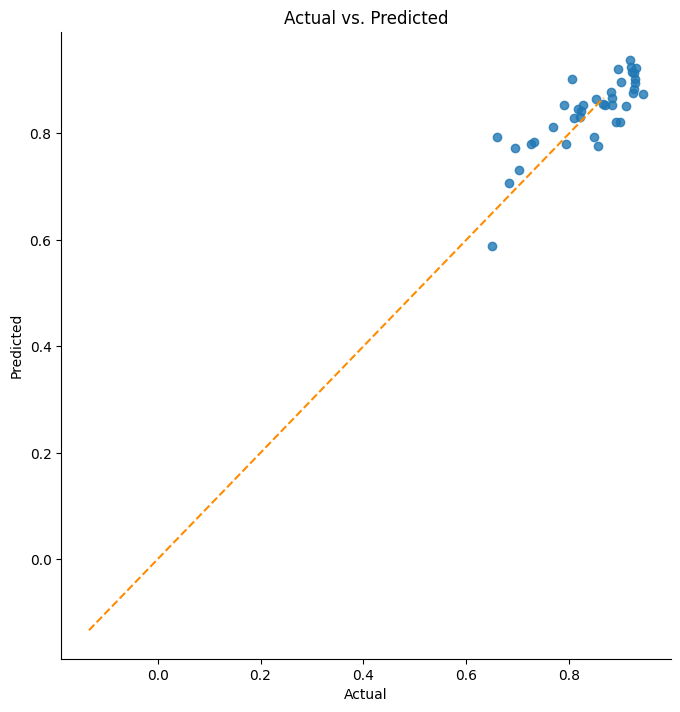

In [84]:
linear_assumption(model, X, y)

In [85]:
def normal_errors_assumption(model, features, label, p_value_thresh=0.05):
    """
    Normality: Assumes that the error terms are normally distributed. If they are not,
    nonlinear transformations of variables may solve this.
               
    This assumption being violated primarily causes issues with the confidence intervals
    """
    from statsmodels.stats.diagnostic import normal_ad
    print('Assumption 2: The error terms are normally distributed', '\n')
    
    # Calculating residuals for the Anderson-Darling test
    df_results = calculate_residuals(model, features, label)
    
    print('Using the Anderson-Darling test for normal distribution')

    # Performing the test on the residuals
    p_value = normal_ad(df_results['Residuals'])[1]
    print('p-value from the test - below 0.05 generally means non-normal:', p_value)
    
    # Reporting the normality of the residuals
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')
    
    # Plotting the residuals distribution
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.distplot(df_results['Residuals'])
    plt.show()
    
    print()
    if p_value > p_value_thresh:
        print('Assumption satisfied')
    else:
        print('Assumption not satisfied')
        print()
        print('Confidence intervals will likely be affected')
        print('Try performing nonlinear transformations on variables')

Assumption 2: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.6695702540408359
Residuals are normally distributed


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



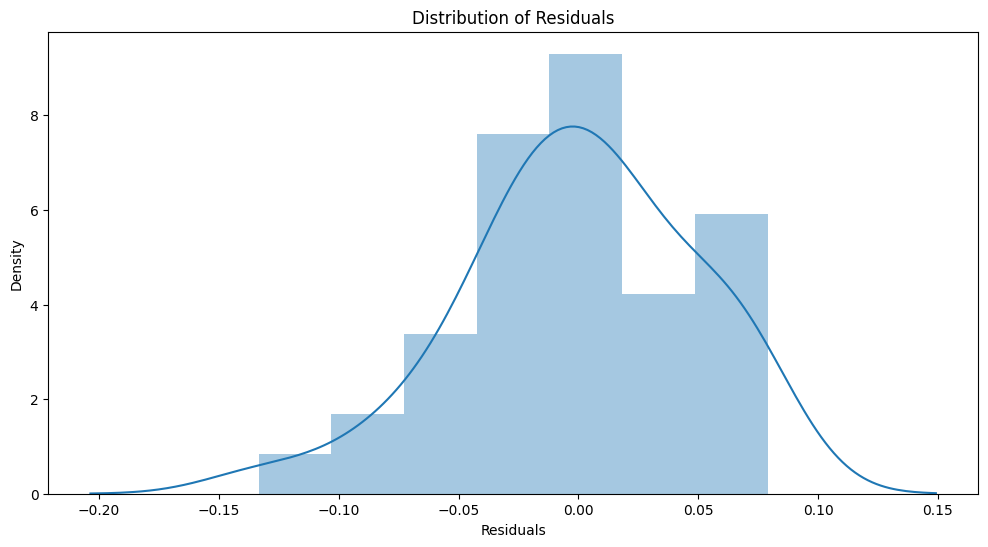


Assumption satisfied


In [86]:
normal_errors_assumption(model, X, y)

In [87]:
def multicollinearity_assumption(model, features, label):
    """
    Multicollinearity: Assumes that predictors are not correlated with each other. If there is
                       correlation among the predictors, then either remove prepdictors with high
                       Variance Inflation Factor (VIF) values or perform dimensionality reduction
                           
                       This assumption being violated causes issues with interpretability of the 
                       coefficients and the standard errors of the coefficients.
    """
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    print('Assumption 3: Little to no multicollinearity among predictors')
        
    # Plotting the heatmap
    plt.figure(figsize = (10,8))
    sns.heatmap(pd.DataFrame(features, columns=features.columns).corr(), annot=True)
    plt.title('Correlation of Variables')
    plt.show()
        
    print('Variance Inflation Factors (VIF)')
    print('> 10: An indication that multicollinearity may be present')
    print('> 100: Certain multicollinearity among the variables')
    print('-------------------------------------')
       
    # Gathering the VIF for each variable
    VIF = [variance_inflation_factor(features, i) for i in range(0,len(features.columns))]
    for idx, vif in enumerate(VIF):
        print('{0}: {1}'.format(features.columns[idx], vif))
        
    # Gathering and printing total cases of possible or definite multicollinearity
    possible_multicollinearity = sum([1 for vif in VIF if vif > 10])
    definite_multicollinearity = sum([1 for vif in VIF if vif > 100])
    print()
    print('{0} cases of possible multicollinearity'.format(possible_multicollinearity))
    print('{0} cases of definite multicollinearity'.format(definite_multicollinearity))
    print()

    if definite_multicollinearity == 0:
        if possible_multicollinearity == 0:
            print('Assumption satisfied')
        else:
            print('Assumption possibly satisfied')
            print()
            print('Coefficient interpretability may be problematic')
            print('Consider removing variables with a high Variance Inflation Factor (VIF)')

    else:
        print('Assumption not satisfied')
        print()
        print('Coefficient interpretability will be problematic')
        print('Consider removing variables with a high Variance Inflation Factor (VIF)')

Assumption 3: Little to no multicollinearity among predictors


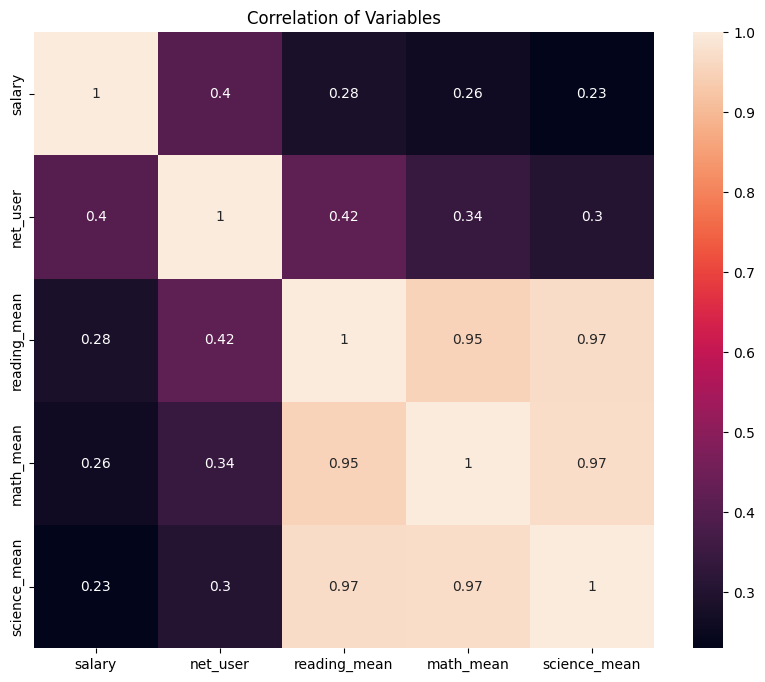

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
salary: 2.081706208489819
net_user: 117.48820418186976
reading_mean: 3320.60687553146
math_mean: 1530.1837927929596
science_mean: 4442.50049392955

4 cases of possible multicollinearity
4 cases of definite multicollinearity

Assumption not satisfied

Coefficient interpretability will be problematic
Consider removing variables with a high Variance Inflation Factor (VIF)


In [88]:
multicollinearity_assumption(model, X, y)

In [89]:
def autocorrelation_assumption(model, features, label):
    """
    Autocorrelation: Assumes that there is no autocorrelation in the residuals. If there is
                     autocorrelation, then there is a pattern that is not explained due to
                     the current value being dependent on the previous value.
                     This may be resolved by adding a lag variable of either the dependent
                     variable or some of the predictors.
    """
    from statsmodels.stats.stattools import durbin_watson
    print('Assumption 4: No Autocorrelation', '\n')
    
    # Calculating residuals for the Durbin Watson-tests
    df_results = calculate_residuals(model, features, label)

    print('\nPerforming Durbin-Watson Test')
    print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
    print('0 to 2< is positive autocorrelation')
    print('>2 to 4 is negative autocorrelation')
    print('-------------------------------------')
    durbinWatson = durbin_watson(df_results['Residuals'])
    print('Durbin-Watson:', durbinWatson)
    if durbinWatson < 1.5:
        print('Signs of positive autocorrelation', '\n')
        print('Assumption not satisfied')
    elif durbinWatson > 2.5:
        print('Signs of negative autocorrelation', '\n')
        print('Assumption not satisfied')
    else:
        print('Little to no autocorrelation', '\n')
        print('Assumption satisfied')

In [90]:
autocorrelation_assumption(model, X, y)

Assumption 4: No Autocorrelation 


Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 1.8249293003282452
Little to no autocorrelation 

Assumption satisfied


In [91]:
def homoscedasticity_assumption(model, features, label):
    """
    Homoscedasticity: Assumes that the errors exhibit constant variance
    """
    print('Assumption 5: Homoscedasticity of Error Terms', '\n')
    
    print('Residuals should have relative constant variance')
        
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)

    # Plotting the residuals
    plt.subplots(figsize=(12, 6))
    ax = plt.subplot(111)  # To remove spines
    plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)  # Removing the right spine
    ax.spines['top'].set_visible(False)  # Removing the top spine
    plt.title('Residuals')
    plt.show()  

Assumption 5: Homoscedasticity of Error Terms 

Residuals should have relative constant variance


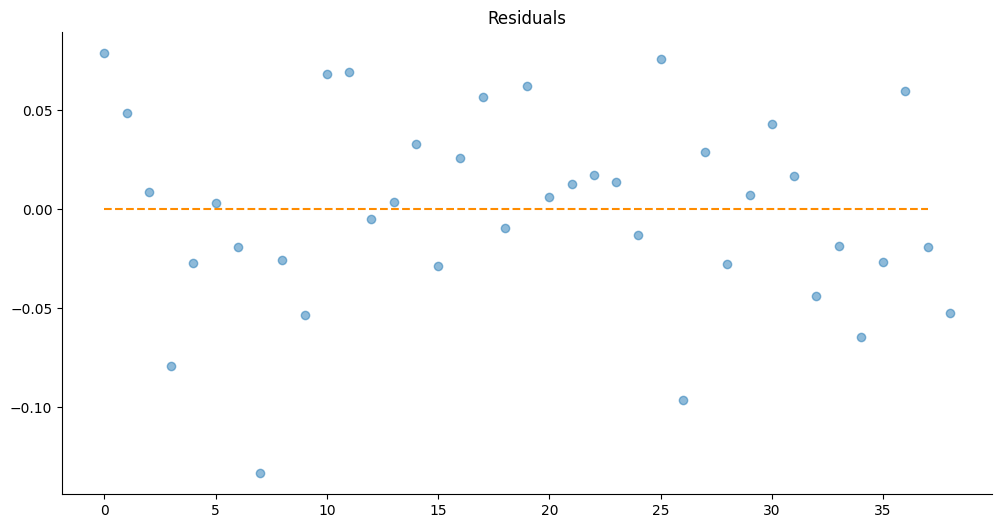

In [92]:
homoscedasticity_assumption(model, X, y)

Source: <https://jeffmacaluso.github.io/post/LinearRegressionAssumptions/>

#### Fix Multicollinearity

In [93]:
X['pisa'] = (X['math_mean']+X['reading_mean']+X['science_mean'])/3
X_new = X[['salary', 'pisa', 'net_user']]
X_new

/var/folders/fc/9dfyqjt13ks879g0zmsg9b2h0000gp/T/ipykernel_786/2465110542.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,salary,pisa,net_user
0,9647.000000,395.000000,85.500
1,62300.000000,499.000000,89.600
2,45807.350000,491.000000,87.529
3,16748.510000,400.333333,81.343
4,19112.280000,516.666667,96.970
5,99302.000000,498.000000,94.200
6,18194.714000,437.666667,88.300
7,25788.780000,578.666667,70.405
8,9684.000000,405.333333,69.790
9,4724.240000,414.666667,80.530


In [94]:
model_2 = LinearRegression()
model_2.fit(X_new, y)
model2_r2 = model_2.score(X_new, y)
model2_r2

0.6546980438811534

Assumption 3: Little to no multicollinearity among predictors


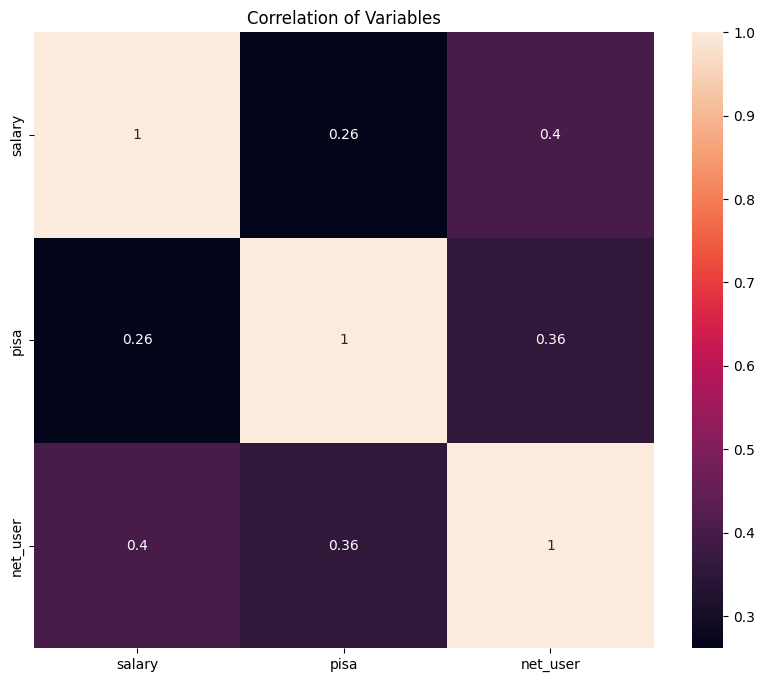

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
salary: 1.9575250601867809
pisa: 78.05740344276174
net_user: 80.98650763551439

2 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption possibly satisfied

Coefficient interpretability may be problematic
Consider removing variables with a high Variance Inflation Factor (VIF)


In [95]:
multicollinearity_assumption(model_2, X_new, y)

Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/regression.py:581: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



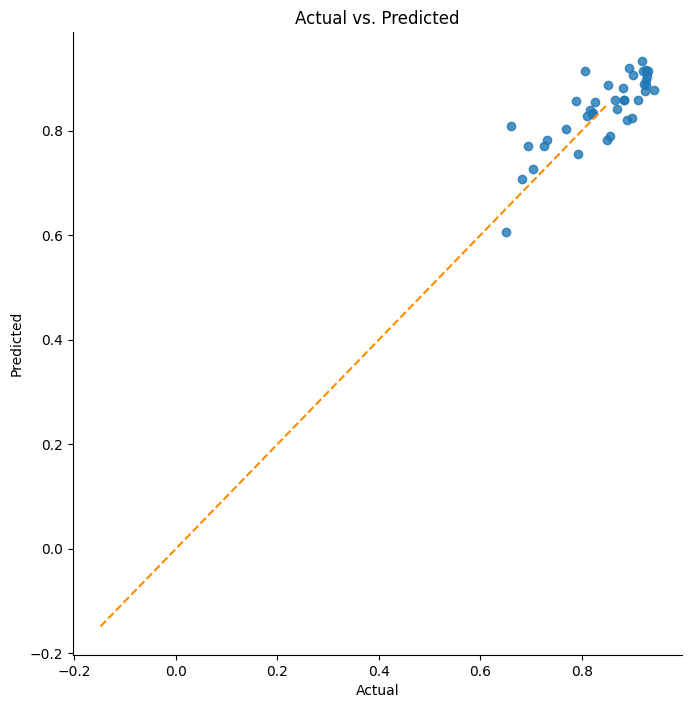

In [96]:
linear_assumption(model_2, X_new, y)

In [97]:
X2_new = sm.add_constant(X_new)
res2 = sm.OLS(y, X2_new).fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          country_index   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     22.12
Date:                Mon, 10 Oct 2022   Prob (F-statistic):           3.28e-08
Time:                        08:33:05   Log-Likelihood:                 62.257
No. Observations:                  39   AIC:                            -116.5
Df Residuals:                      35   BIC:                            -109.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0981      0.109      0.901      0.374      -0.123       0.319
salary      1.493e-07   2.25e-07      0.663      0.512   -3.08e-07    6.06e-07
pisa           0.0005      0.000      2.612      0.013       0.000       0.001
net_user       0.0055      0.001      5.571      0.000       0.004       0.008
==============================================================================
Omnibus:                        6.055   Durbin-Watson:                   1.851
Prob(Omnibus):                  0.048   Jarque-Bera (JB):                4.682
Skew:                          -0.776   Prob(JB):                       0.0962
Kurtosis:                       3.686   Cond. No.                     7.14e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [99]:
x = X_new['salary']
y2 = X_new['pisa']
x2 = sm.add_constant(x)
res3 = sm.OLS(y2, x2).fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   pisa   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     2.712
Date:                Mon, 10 Oct 2022   Prob (F-statistic):              0.108
Time:                        08:34:29   Log-Likelihood:                -200.40
No. Observations:                  39   AIC:                             404.8
Df Residuals:                      37   BIC:                             408.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        467.0808      9.084     51.418      0.000     448.675     485.487
salary         0.0003      0.000      1.647      0.108   -6.34e-05       0.001
==============================================================================
Omnibus:                        2.132   Durbin-Watson:                   2.293
Prob(Omnibus):                  0.344   Jarque-Bera (JB):                1.316
Skew:                          -0.435   Prob(JB):                        0.518
Kurtosis:                       3.233   Cond. No.                     7.28e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.28e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Education Gap in Indonesia (by Province)

In [27]:
edu_gap = pd.read_csv("https://raw.githubusercontent.com/nurkhamidah/Education_Dashboard/master/34provinces_edugap.csv", sep=",")
edu_gap

,Unnamed: 0,no,prov_name,school,student,teacher,angka_hls,rata_lama_sekolah
0,1,1,Jawa Timur,25533,4344401,125594,13.36,7.88
1,2,2,Jawa Barat,27244,7035609,149430,12.61,8.61
2,3,3,Jawa Tengah,23034,4266632,225544,12.77,7.75
3,4,4,Sumatera Utara,13554,2561347,165446,13.27,9.58
4,5,5,Sulawesi Selatan,8746,1443681,108021,13.52,8.46
5,6,6,Banten,6837,1838197,65988,13.02,8.93
6,7,7,Nusa Tenggara Timur,7617,1200640,93163,13.20,7.69
7,8,8,Lampung,6687,1296465,86460,12.73,8.08
8,9,9,Sumatera Selatan,5460,656273,40365,12.54,8.30
9,10,10,Aceh,2160,818876,80679,14.36,9.37
